{'10011110': 1}


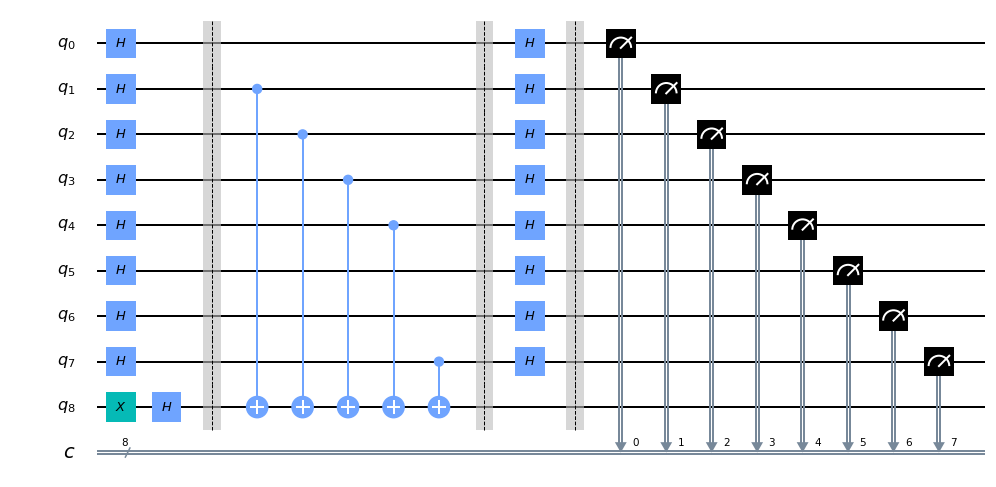

In [131]:
#find the secret binary number in one attempt
from qiskit import QuantumCircuit

secretNumber = '10011110'  #{'100111000111000111': 1}
circuit = QuantumCircuit(len(secretNumber)+1,len(secretNumber))
circuit.h([i for i in range(len(list(secretNumber)))])
circuit.x(len(secretNumber))
circuit.h(len(secretNumber))
circuit.barrier()
n = len(list(secretNumber))
for yesno in range(len(list(secretNumber))) :
  index = n - yesno -1
  if secretNumber[index] == '1' :
    circuit.cx(yesno,len(secretNumber))
circuit.barrier()
circuit.h([i for i in range(len(list(secretNumber)))])
circuit.barrier()
circuit.measure([i for i in range(len(list(secretNumber)))],[i for i in range(len(list(secretNumber)))])
result = execute(circuit,Aer.get_backend('qasm_simulator'),shots=1).result()
print(result.get_counts())
circuit.draw(output='mpl')

{'10001111': 1}


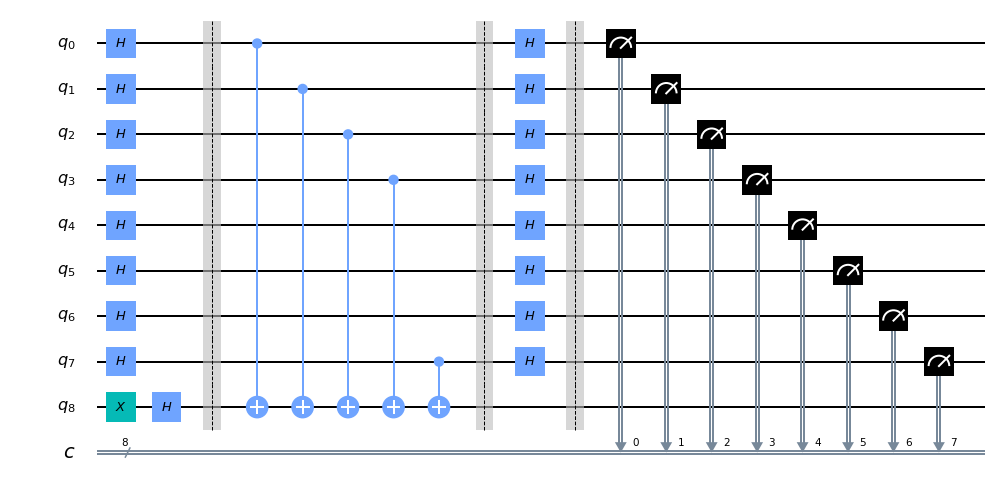

In [160]:
from qiskit import Aer,execute,QuantumCircuit
from qiskit.visualization import plot_bloch_multivector,plot_histogram
numberTofind = '10001111'
circuit = QuantumCircuit(len(numberTofind) + 1, len(numberTofind))
circuit.h([i for i in range(len(list(numberTofind)))])
circuit.x(len(numberTofind))
circuit.h(len(numberTofind))
circuit.barrier()
for yesno in range(len(list(numberTofind))):
  index = len(list(numberTofind)) - yesno - 1
  if numberTofind[index] == '1' :
    circuit.cx(yesno,len(numberTofind))
circuit.barrier()
circuit.h([i for i in range(len(numberTofind))])
circuit.barrier()
circuit.measure([i for i in range(len(numberTofind))],[i for i in range(len(numberTofind))])
result = execute(circuit, backend=Aer.get_backend('statevector_simulator'), shots=1024).result()
print(result.get_counts())
#plot_histogram(result.get_counts(circuit))
circuit.draw(output='mpl')